# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

一个神经元计算： 是一个线性函数 z = wx+b ； 嵌套一个激活函数  a（z） 

w代表：特征值的权重
b代表：代表偏差
a代表： 激活函数，模拟神经元的“抑制”和“兴奋”状态

####  2. Why we use non-linear activation funcitons in neural networks?

答: 因为假设激活函数为线性；输出作为下一层的输入进行迭代，还是个线性函数；即不管隐藏层迭代多少层，结果还是一样的；失去了“深度”的意义。

#### 3. What is the 'Logistic Loss' ?

答：L（y，y_hat） = - y logy_hat - (1-y) log (1-y_hat)

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

答： C sigmoid函数

#### 5. Why we don't use zero initialization for all parameters ?

答： 用“0”初始化参数，导致不同样本的x，与参数“0”相乘后，输出的结果都是一样的“0”；进而反向梯度也是一样，导致所有神经元都是一样的。最终模型将不能正确拟合不同特征值的权重差异。

#### 6. Can you implement the softmax function using python ? 

$$S_{i}=\cfrac{e^i}{\sum_j(e^j)} $$

In [3]:
import numpy as np

def softmax(L):
    exp_L = np.exp(L)
    sum = np.sum(exp_L)
    return exp_L/sum

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [2]:
# Loading the data 
digits = datasets.load_digits()

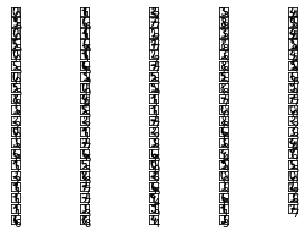

In [3]:
# Vilizating the data
for i in range(1,100):
    plt.subplot(20,5,i)  # 两行五列
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
# Split the data into training set and test set  切分数据集（25%测试集）
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [5]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.
#设置数据集标签 ；小于5是0；大于等于5是1
y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

注释：代表了 8×8=64个像素，每个像素代表一个特征（列）；64个特征表征了一条【数字】数据 ； 训练集一共1347条数据，测试集一共450条数据 

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [7]:
import numpy as np
import random

In [8]:
def sigmoid(z):
    s = 1./(1 + np.exp(-1 * z))
    return s

In [10]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [11]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''    
    w = np.random.rand(dim,1)
    b = random.random()
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [12]:
initialize_parameters(15)

(array([[0.96807097],
        [0.93785202],
        [0.0303941 ],
        [0.4126894 ],
        [0.57492382],
        [0.92875786],
        [0.89537685],
        [0.93823946],
        [0.58302724],
        [0.52271782],
        [0.21597041],
        [0.09718439],
        [0.44774891],
        [0.05220031],
        [0.73292027]]), 0.6657952806563304)

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [14]:
import math

In [15]:
def propagate(w,b,X,Y):    
    
    # X 是一个（特征数 × 数据组数）的矩阵 代表输入数据
    # Y 是一个 （数据组数 ×1 ）的矩阵  代表了 每组X数据的 真实值 
    # w 是一个 (1×数据组数 )的矩阵 ，代表了权重
    # b 是一个随机数     
    m = X.shape[1]  # m 代表 X有几组数据 注意：X列代表 【数据组数】；行代表 【特征个数 （别弄混了）】
    i = 0        
    xi = X[:,i]  # xi 代表 X矩阵第i列，代表i组数据
    yi = Y[:,0][i]  # yi 代表 Y矩阵第i列 ， 代表 i组数据的 标签值   
    cost_sum = 0
    db_sum = 0
    db = 0
    n = 0   
    L = []     #存储： A - Y
    for i in range(m):   # 对 X矩阵每一组数据进行遍历
        xi = X[:,i]  # xi 代表 X矩阵第i列，代表i组数据
        z = np.dot(w, xi) +b   # z是一个数值 ; xi 是一个（n×1）的矩阵 代表了X中的第i列数据 
        ai = sigmoid(z)  # A 是一个数值【0 - 1】
        yi = Y[:,0][i]  # yi 代表 Y矩阵第i列 ， 代表 i组数据的 标签值
        cost_i = (-1)*(yi)*math.log(ai+0.000000000001)-(1-yi)*math.log(1-ai+0.000000000001)  # log不能为0, +趋近于0的小数防止报错
        cost_sum += cost_i    # 求和                        
        #求 dw相关部分 A-Y
        l = (ai - yi).tolist()[0]  #矩阵元素想减
        L.append(l)      
        #求 db相关部分        
        b = ai - yi
        db_sum += b
        
        #训练精度 正确率 =预测正确的组数（a=y） / 总的数据组数
        
        if (ai - yi)**2<0.0001:
            n=n+1
        else:
            pass
    accuracy = n/m*100
    #print('精度是:',accuracy)
                
        
    cost = cost_sum/m   #最终 cost 值      
    #求dx
    L = np.array(L)                    
    L = L.reshape(-1,1) # 将矩阵 （A-Y）转置  (1347×1)       
    dw = X@L/m  # dw 是一个 (64×1)的向量;代表了 64个特征对应的变化趋势
    #dw = dw.reshape(-1,1) #转置 dw 是一个 (1×64)的向量;代表了 64个特征对应的变化趋势    
    #求db
    db = db_sum / m            
    #assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())    
    grads = {'dw':dw,
             'db':db}
    return grads, cost , accuracy

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [16]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''                
    costs = []
    #accuracys = [] 
    #grads, cost = None   
    for i in range(num_iterations):           # 训练 num_iterations次
        grads = propagate(w,b,X,Y)[0]         #接上个模块函数 输出 计算1次的字典
        cost = propagate(w,b,X,Y)[1]          #上个模块函数  输出 计算1次的cost
        accuracy = propagate(w,b,X,Y)[2]
        #accuracys.append(accuracy)
        dw = grads['dw']        
        dw = dw.reshape(1,-1) #转置 dw 是一个 (1×64)的向量;代表了 64个特征对应的变化趋势                        
        db = grads['db']
        #print(type(dw),dw.shape)
        #print(type(w),w.shape)
        a = learning_rate  # a 是学习率        
        w = w - a*dw                
        b = b - a*db                 
        if i % 100 == 0:
            cost=float(cost)
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            print ('Accuracy after iteration %i:%f'%(i,accuracy) )
    params = {"w":w,
              "b":b}   
    grads = {"dw":dw,
             "db":db}
    
    
    
    
    return params, grads, costs ,accuracy

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

用训练好的参数 w，b 构建一个预测函数，预测新的数据集X的标签Y

In [17]:
def predict(w_trained, b_trained, X_test, y_test):

    m_test = X_test.shape[1]
    #Y_prediction = np.zeros((1,m_test))
    Y_prediction = [ ]
    
    w = w_trained
    i=0
    yi = y_test[:,0][i]
    p=0
    cost_test_sum=0
    for i in range(m_test): 
        xi = X_test[:,i]  # xi 代表 X矩阵第i列，代表i组数据
        yi = y_test[:,0][i]
        z = np.dot(w, xi) + b_trained   # z是一个数值 ; xi 是一个（n×1）的矩阵 代表了X中的第i列数据       
        A = sigmoid(z)  # A 是一个数值【0 - 1】
            
        Y_prediction.append(A)
        
        if (A - yi)**2 < 0.000001:
            p=p+1
        else:
            pass
    
        cost_test_i = (-1)*(yi)*math.log(A+0.000000000001)-(1-yi)*math.log(1-A+0.000000000001) 
        cost_test_sum += cost_test_i    # 求和  
        
    Y_prediction = np.array(Y_prediction)  
    cost_test = cost_test_sum/m_test   #最终 cost 值   
    
    
    accuracy_test = p/m_test*100
    #print ('Accuracy_test :%f'%(accuracy_test) )        
    #assert(Y_prediction.shape == (1,m_test))
    
    return Y_prediction , accuracy_test , cost_test

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

思路
step1 ： 准备训练集，测试集
step2 ： 准备初始化的 w_Initialization 和 b_Initialization
step3 ： 构建模型；输入训练集，得出 训练后的 w_trained ，b_trained  训练精度 ， cost_trained
step4 ： 用 w_trained ，b_trained 构建模型 predict
step5 ： 将 测试数据 输入predict， 得出 测试精度 ， cost_test


# STEP1 ：准备数据集

In [18]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import numpy as np
import random

In [19]:
# Loading the data 
digits = datasets.load_digits()

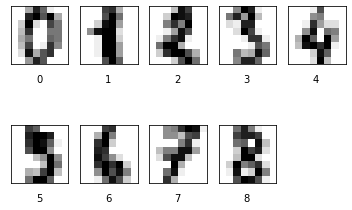

In [20]:
# Vilizating the data
for i in range(1,10):
    plt.subplot(2,5,i)  # 两行五列
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [21]:
# Split the data into training set and test set  切分数据集（25%测试集）
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [22]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.
#设置数据集标签 ；小于5是0；大于等于5是1
y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

注释：代表了 8×8=64个像素，每个像素代表一个特征（列）；64个特征表征了一条【数字】数据 ；重新定义了标签值，大于等于5的数赋值为1，小于5的数赋值为0； 

训练集一共1347条数据，测试集一共450条数据【代表：行】

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

(1347, 64)
(450, 64)
(1347,)
(450,)
[1 1 0 ... 0 1 1]


In [24]:
X_train = np.transpose(X_train)   
y_train = y_train.reshape(-1,1)
X_test = np.transpose(X_test)   
y_test = y_test.reshape(-1,1)


print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(64, 1347) (1347, 1)
(64, 450) (450, 1)


# STEP2 ： 准备初始化的 w_Initialization 和 b_Initialization

w_Initialization ,b_Initialization,作为原始输入

w_Initialization是一个【1，64】的向量；  
b_Initialization是一个随机数

In [25]:
w_Initialization = np.random.rand(1,64)  #随机给w赋值 (64×1的矩阵)
b_Initialization = random.random()   #随机给w赋值 

In [26]:
print(w_Initialization,w_Initialization.shape)
print(b_Initialization)

[[0.7161566  0.8717656  0.01759522 0.87331493 0.81132216 0.58160349
  0.37870303 0.99988512 0.82273895 0.99929295 0.59683861 0.76850233
  0.861788   0.01900855 0.05096572 0.07973946 0.39137697 0.39944227
  0.24932241 0.52762635 0.7800676  0.42744151 0.15272518 0.1704073
  0.87135508 0.49784337 0.71232842 0.36550236 0.55073239 0.96543703
  0.32217333 0.97695615 0.52622197 0.8538179  0.68325643 0.84381758
  0.10118424 0.84772275 0.95403119 0.64796128 0.30723955 0.83824043
  0.47791443 0.80065361 0.88678566 0.92914529 0.97866107 0.71098944
  0.55026455 0.14268921 0.73040492 0.64032551 0.59463343 0.49417305
  0.02560168 0.22660916 0.91716005 0.3003959  0.03551708 0.24488205
  0.88182044 0.4059776  0.48389565 0.54885948]] (1, 64)
0.32495345292220645


# STEP3 ： 构建模型；输入训练集，得出 训练后的 w_trained ，b_trained ， 训练精度 ， cost_trained

In [54]:
def propagate(w,b,X,Y):    
    
    # X 是一个（特征数 × 数据组数）的矩阵 代表输入数据
    # Y 是一个 （数据组数 ×1 ）的矩阵  代表了 每组X数据的 真实值 
    # w 是一个 (1×数据组数 )的矩阵 ，代表了权重
    # b 是一个随机数     
    m = X.shape[1]  # m 代表 X有几组数据 注意：X列代表 【数据组数】；行代表 【特征个数 （别弄混了）】
    i = 0        
    xi = X[:,i]  # xi 代表 X矩阵第i列，代表i组数据
    yi = Y[:,0][i]  # yi 代表 Y矩阵第i列 ， 代表 i组数据的 标签值   
    cost_sum = 0
    db_sum = 0
    db = 0
    n = 0   
    L = []     #存储： A - Y
    for i in range(m):   # 对 X矩阵每一组数据进行遍历
        xi = X[:,i]  # xi 代表 X矩阵第i列，代表i组数据
        z = np.dot(w, xi) +b   # z是一个数值 ; xi 是一个（n×1）的矩阵 代表了X中的第i列数据 
        ai = sigmoid(z)  # A 是一个数值【0 - 1】
        yi = Y[:,0][i]  # yi 代表 Y矩阵第i列 ， 代表 i组数据的 标签值
        cost_i = (-1)*(yi)*math.log(ai+0.000000000001)-(1-yi)*math.log(1-ai+0.000000000001)  # log不能为0, +趋近于0的小数防止报错
        cost_sum += cost_i    # 求和                        
        #求 dw相关部分 A-Y
        l = (ai - yi).tolist()[0]  #矩阵元素想减
        L.append(l)      
        #求 db相关部分        
        b = ai - yi
        db_sum += b
        
        #训练精度 正确率 =预测正确的组数（a=y） / 总的数据组数
        
        if (ai - yi)**2<0.0001:
            n=n+1
        else:
            pass
    accuracy = n/m*100
    #print('精度是:',accuracy)
                
        
    cost = cost_sum/m   #最终 cost 值      
    #求dx
    L = np.array(L)                    
    L = L.reshape(-1,1) # 将矩阵 （A-Y）转置  (1347×1)       
    dw = X@L/m  # dw 是一个 (64×1)的向量;代表了 64个特征对应的变化趋势
    #dw = dw.reshape(-1,1) #转置 dw 是一个 (1×64)的向量;代表了 64个特征对应的变化趋势    
    #求db
    db = db_sum / m            
    #assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())    
    grads = {'dw':dw,
             'db':db}
    return grads, cost , accuracy

In [86]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''                
    costs = []
    accuracys = []
    x_axis = []
    #grads, cost = None   
    for i in range(num_iterations):           # 训练 num_iterations次
        grads = propagate(w,b,X,Y)[0]         #接上个模块函数 输出 计算1次的字典
        cost = propagate(w,b,X,Y)[1]          #上个模块函数  输出 计算1次的cost
        accuracy = propagate(w,b,X,Y)[2]
        #accuracys.append(accuracy)
        dw = grads['dw']        
        dw = dw.reshape(1,-1) #转置 dw 是一个 (1×64)的向量;代表了 64个特征对应的变化趋势                        
        db = grads['db']
        #print(type(dw),dw.shape)
        #print(type(w),w.shape)
        a = learning_rate  # a 是学习率        
        w = w - a*dw                
        b = b - a*db                 
        if i % 100 == 0:
            cost=float(cost)
            costs.append(cost)
            accuracys.append(accuracy)
            x_axis.append(i)
        if print_cost and i % 100 == 0:
            print ("第 %i 轮 Cost: %f" %(i, cost))
            print ('第 %i 轮 Accuracy :%f'%(i,accuracy) )
        
        
        
    y_accuracys = accuracys
    y_costs = costs
    x = x_axis
    
    fig, ax1 = plt.subplots() # 使用subplots()创建窗口
    ax2 = ax1.twinx() # 创建第二个坐标轴
    
    ax1.plot(x, y_costs,'r', label = 'costs')
    ax2.plot(x, y_accuracys,'g' , label = 'accuracy')

    plt.show()    
        
        
        
        
    params = {"w":w,
              "b":b}   
    grads = {"dw":dw,
             "db":db}
    
    
    
    
    return params, grads, costs ,accuracys

# Step4 ： 用 w_trained ，b_trained 构建模型 predict

In [69]:
def predict(w_trained, b_trained, X_test, y_test):

    m_test = X_test.shape[1]
    #Y_prediction = np.zeros((1,m_test))
    Y_prediction = [ ]
    
    w = w_trained
    i=0
    yi = y_test[:,0][i]
    p=0
    cost_test_sum=0
    for i in range(m_test): 
        xi = X_test[:,i]  # xi 代表 X矩阵第i列，代表i组数据
        yi = y_test[:,0][i]
        z = np.dot(w, xi) + b_trained   # z是一个数值 ; xi 是一个（n×1）的矩阵 代表了X中的第i列数据       
        A = sigmoid(z)  # A 是一个数值【0 - 1】
            
        Y_prediction.append(A)
        
        if (A - yi)**2 < 0.000001:
            p=p+1
        else:
            pass
    
        cost_test_i = (-1)*(yi)*math.log(A+0.000000000001)-(1-yi)*math.log(1-A+0.000000000001) 
        cost_test_sum += cost_test_i    # 求和  
        
    Y_prediction = np.array(Y_prediction)  
    cost_test = cost_test_sum/m_test   #最终 cost 值   
    
    
    accuracy_test = p/m_test*100
    #print ('Accuracy_test :%f'%(accuracy_test) )        
    #assert(Y_prediction.shape == (1,m_test))
    
    return Y_prediction , accuracy_test , cost_test

# Step5 ：最终模型并预测

In [87]:
def model(X_train, Y_trein, X_test, y_test,  num_iterations, learning_rate,print_cost):    
    w_Initialization = np.random.rand(1,64)  #随机给w赋值 (64×1的矩阵)
    b_Initialization = random.random()   #随机给w赋值 
        
    params =  optimize(w_Initialization,b_Initialization, X_train, y_train, num_iterations, learning_rate, print_cost=True)[0]
    
    #costs_train = optimize(w_Initialization,b_Initialization, X_train, y_train, num_iterations, learning_rate, print_cost=True)[2]
    #accuracy_train = optimize(w_Initialization,b_Initialization, X_train, y_train, num_iterations, learning_rate, print_cost=True)[3]
    
    w_trained =  params['w']
    b_trained =  params['b']

        
    Y_prediction = predict(w_trained, b_trained, X_test, y_test)[0]
    accuracy_test =  predict(w_trained, b_trained, X_test, y_test)[1]
    cost_test =   predict(w_trained, b_trained, X_test, y_test)[2] 
    
    
        
    
    print('预测精度：',accuracy_test)
    print('预测cost：',cost_test)
    
    
    
    return Y_prediction , accuracy_test ,cost_test 
   
    
        
    

# 迭代1000次 ， 学习率 0.001 

第 0 轮 Cost: 13.887306
第 0 轮 Accuracy :49.740163
第 100 轮 Cost: 7.276588
第 100 轮 Accuracy :45.879733
第 200 轮 Cost: 2.670402
第 200 轮 Accuracy :43.875278
第 300 轮 Cost: 2.067612
第 300 轮 Accuracy :45.285820
第 400 轮 Cost: 1.689164
第 400 轮 Accuracy :47.216036
第 500 轮 Cost: 1.444821
第 500 轮 Accuracy :48.478099
第 600 轮 Cost: 1.274237
第 600 轮 Accuracy :50.111359
第 700 轮 Cost: 1.146358
第 700 轮 Accuracy :52.115813
第 800 轮 Cost: 1.045418
第 800 轮 Accuracy :53.526355
第 900 轮 Cost: 0.962950
第 900 轮 Accuracy :54.268745


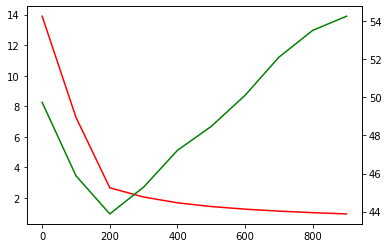

预测精度： 40.22222222222222
预测cost： 0.9469969438305281


(array([[2.95047745e-03],
        [9.99999990e-01],
        [7.08047441e-03],
        [9.99999965e-01],
        [8.55542870e-03],
        [1.88910809e-07],
        [9.99998425e-01],
        [8.08378478e-01],
        [1.07293500e-05],
        [9.99999993e-01],
        [5.56170441e-03],
        [1.56383730e-02],
        [8.37351599e-01],
        [7.58173227e-01],
        [9.58935949e-02],
        [9.99999999e-01],
        [1.45591646e-01],
        [5.86538467e-08],
        [4.56829712e-03],
        [9.99994849e-01],
        [9.99999962e-01],
        [9.99747265e-01],
        [6.63632465e-07],
        [9.99988640e-01],
        [5.53773098e-04],
        [9.99999909e-01],
        [2.27471563e-01],
        [1.42248779e-04],
        [9.99982487e-01],
        [3.03273749e-01],
        [9.95646683e-01],
        [9.99999895e-01],
        [9.99971187e-01],
        [9.99995846e-01],
        [8.32763481e-01],
        [1.69438522e-03],
        [9.99749528e-01],
        [4.79993276e-03],
        [2.1

In [88]:
model( X_train, y_train, X_test, y_test,num_iterations=1000, learning_rate=0.001,print_cost=False)

结论：迭代１０００次，学习率０.００１，训练拐点出现在２００次附近；训练精度：54%，预测精度为４０％　，预测ｃｏｓｔ为０.９４

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

# 迭代1000次 ， 学习率 0.0001  VS  迭代1000次 ，学习率0.001

第 0 轮 Cost: 13.887306
第 0 轮 Accuracy :49.740163
第 100 轮 Cost: 13.887306
第 100 轮 Accuracy :49.740163
第 200 轮 Cost: 13.887306
第 200 轮 Accuracy :49.740163
第 300 轮 Cost: 13.887306
第 300 轮 Accuracy :49.740163
第 400 轮 Cost: 13.887306
第 400 轮 Accuracy :49.740163
第 500 轮 Cost: 13.887306
第 500 轮 Accuracy :49.740163
第 600 轮 Cost: 13.887306
第 600 轮 Accuracy :49.740163
第 700 轮 Cost: 13.887185
第 700 轮 Accuracy :49.740163
第 800 轮 Cost: 13.867158
第 800 轮 Accuracy :49.740163
第 900 轮 Cost: 13.510636
第 900 轮 Accuracy :49.740163


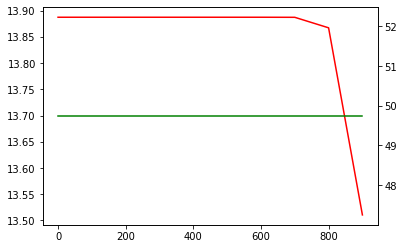

预测精度： 50.0
预测cost： 11.582467004497056


(array([[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.99710099],
        [1.        ],
        [1.        ],
        [0.99999998],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.99999996],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.97590478],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.99999986],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.99999978],
        [0.99999401],
        [1.        ],
        [1.        ],
        [1.        ],
        [1

In [89]:
model( X_train, y_train, X_test, y_test,num_iterations=1000, learning_rate=0.0001,print_cost=False)

结论： 迭代1000次，学习率0.0001，明显迭代次数不足，准确率，cost数值未发生明显变化；若要看到最终效果，需要进一步加大迭代次数

# 迭代1000次 ， 学习率 0.01  VS  迭代1000次 ，学习率0.001

第 0 轮 Cost: 13.887306
第 0 轮 Accuracy :49.740163
第 100 轮 Cost: 0.752463
第 100 轮 Accuracy :46.473645
第 200 轮 Cost: 0.480159
第 200 轮 Accuracy :47.587231
第 300 轮 Cost: 0.375495
第 300 轮 Accuracy :44.617669
第 400 轮 Cost: 0.330666
第 400 轮 Accuracy :43.875278
第 500 轮 Cost: 0.308634
第 500 轮 Accuracy :41.648107
第 600 轮 Cost: 0.295209
第 600 轮 Accuracy :40.460282
第 700 轮 Cost: 0.285899
第 700 轮 Accuracy :39.049740
第 800 轮 Cost: 0.279046
第 800 轮 Accuracy :37.861915
第 900 轮 Cost: 0.273861
第 900 轮 Accuracy :37.193764


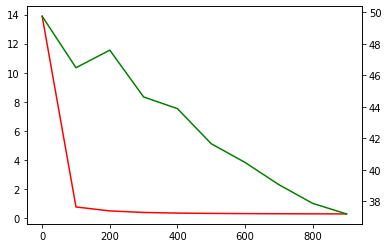

预测精度： 13.555555555555557
预测cost： 0.3075411351786778


(array([[8.66735553e-01],
        [9.91342030e-01],
        [4.09509780e-01],
        [9.98005020e-01],
        [2.44476707e-01],
        [7.25713903e-03],
        [9.99906887e-01],
        [2.58941966e-02],
        [9.23141839e-03],
        [9.98474417e-01],
        [5.94747874e-01],
        [3.77924906e-01],
        [1.26158914e-01],
        [8.77860158e-01],
        [8.50537557e-01],
        [9.99937193e-01],
        [7.20187142e-03],
        [2.13855927e-03],
        [2.00916161e-01],
        [9.79374403e-01],
        [9.98789503e-01],
        [8.68646763e-01],
        [3.54105811e-03],
        [9.94655908e-01],
        [8.36338200e-04],
        [9.99833970e-01],
        [2.40172937e-02],
        [1.30685080e-01],
        [9.96237051e-01],
        [9.25101629e-03],
        [9.81337407e-01],
        [9.99985432e-01],
        [9.79587297e-01],
        [9.98049924e-01],
        [5.20376336e-01],
        [4.83064415e-01],
        [9.73804769e-01],
        [3.18466282e-03],
        [1.2

In [90]:
model( X_train, y_train, X_test, y_test,num_iterations=1000, learning_rate=0.01,print_cost=False)

结论： 迭代1000次，学习率0.01，曲线收敛比0.001快，但是精度不足，预测精度13% ，训练精度 37% ；过拟合现象严重。

##### 4.2 Observe the effect of iteration_num on the test accuracy.

# 迭代5000次 ， 学习率 0.001； VS 迭代1000次 ，学习率0.001 

第 0 轮 Cost: 13.887306
第 0 轮 Accuracy :49.740163
第 100 轮 Cost: 13.679635
第 100 轮 Accuracy :49.740163
第 200 轮 Cost: 3.000317
第 200 轮 Accuracy :36.377134
第 300 轮 Cost: 2.224855
第 300 轮 Accuracy :37.564959
第 400 轮 Cost: 1.747693
第 400 轮 Accuracy :40.014848
第 500 轮 Cost: 1.448606
第 500 轮 Accuracy :41.573868
第 600 轮 Cost: 1.248610
第 600 轮 Accuracy :42.613215
第 700 轮 Cost: 1.104651
第 700 轮 Accuracy :44.469191
第 800 轮 Cost: 0.992781
第 800 轮 Accuracy :45.434298
第 900 轮 Cost: 0.900997
第 900 轮 Accuracy :46.547884
第 1000 轮 Cost: 0.823831
第 1000 轮 Accuracy :46.919079
第 1100 轮 Cost: 0.758598
第 1100 轮 Accuracy :47.216036
第 1200 轮 Cost: 0.703347
第 1200 轮 Accuracy :47.809948
第 1300 轮 Cost: 0.656380
第 1300 轮 Accuracy :48.255382
第 1400 轮 Cost: 0.616242
第 1400 轮 Accuracy :48.181143
第 1500 轮 Cost: 0.581741
第 1500 轮 Accuracy :48.181143
第 1600 轮 Cost: 0.551921
第 1600 轮 Accuracy :48.181143
第 1700 轮 Cost: 0.526017
第 1700 轮 Accuracy :47.884187
第 1800 轮 Cost: 0.503411
第 1800 轮 Accuracy :47.884187
第 1900 轮 Cost: 

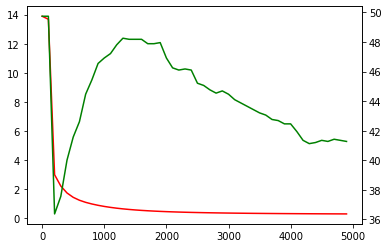

预测精度： 18.0
预测cost： 0.3296466646330982


(array([[6.64588003e-01],
        [9.93195673e-01],
        [4.53398520e-02],
        [9.95469987e-01],
        [4.79191126e-02],
        [3.69925999e-04],
        [9.99563352e-01],
        [1.26233976e-02],
        [6.75331501e-04],
        [9.99720883e-01],
        [2.96645778e-01],
        [4.31528222e-01],
        [9.92931979e-02],
        [5.66317242e-01],
        [4.41426301e-01],
        [9.99984258e-01],
        [1.22078433e-03],
        [4.23819762e-04],
        [1.38851386e-01],
        [9.72174935e-01],
        [9.84935565e-01],
        [7.94392312e-01],
        [1.74265910e-04],
        [9.99261906e-01],
        [5.88826284e-04],
        [9.98937607e-01],
        [3.53910484e-02],
        [4.51818791e-02],
        [9.97965752e-01],
        [8.59897897e-03],
        [9.82823260e-01],
        [9.99932707e-01],
        [9.60626792e-01],
        [9.98808454e-01],
        [4.76425205e-02],
        [5.65399124e-01],
        [9.96734838e-01],
        [8.45591310e-04],
        [2.4

In [91]:
model( X_train, y_train, X_test, y_test,num_iterations=5000, learning_rate=0.001,print_cost=False)

结论： 迭代5000次，学习率0.01，预测精度18% ，训练精度41%，过渡训练导致的过拟合现象。

# 总结

1. 学习率过低，导致步长变小，需要跟多的计算成本，提升计算轮次
2. 学习率过高，过拟合现象明显，测试精度与训练精度差异大
3. 学习轮次提升，过拟合现象明显，测试精度与训练精度差异大

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

# Congratulations ! You have completed assigment 4. 